No handles with labels found to put in legend.


{'points': 458, 'rebounds': 640, 'assists': 176}


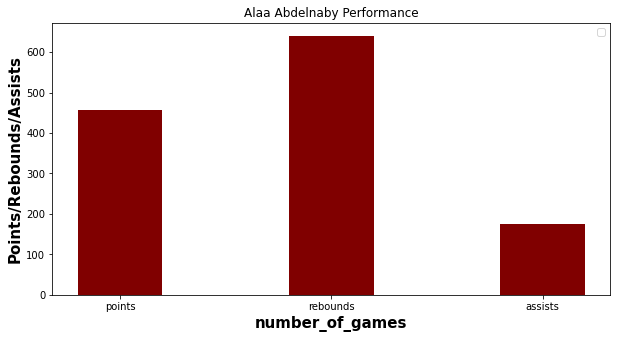

                     name  AST  TRB  PTS  Performance
0          Alaa Abdelnaby  176  640  458        456.2
1         Zaid Abdul-Aziz  109   89  279        188.0
2     Kareem Abdul-Jabbar  140  100  438        277.0
3      Mahmoud Abdul-Rauf   20  296   63        124.3
4       Tariq Abdul-Wahad   20   84   59         58.7
...                   ...  ...  ...  ...          ...
4545           Ante Zizic   96    7  492        267.3
4546             Jim Zoet   57   72  289        177.5
4547            Bill Zopf    0    9   11          8.2
4548          Ivica Zubac   57   63  278        169.3
4549           Matt Zunic   75  204  268        210.2

[4550 rows x 5 columns]
                   name  AST   TRB   PTS  Performance
1814    Tyler Honeycutt  275   869  3586       2108.7
1694        Chuck Hayes  192   138  4029       2094.3
1948       Damion James  403   509  2948       1707.3
4091       Myles Turner  492  1246  2450       1697.2
1582         Bruce Hale  148   288  3033       1632.5
356

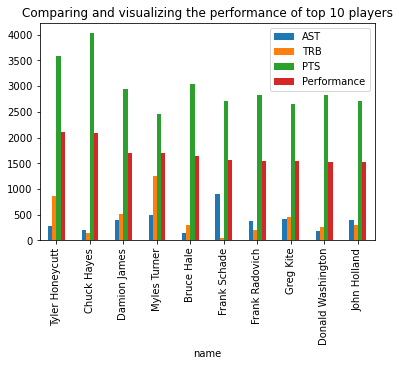

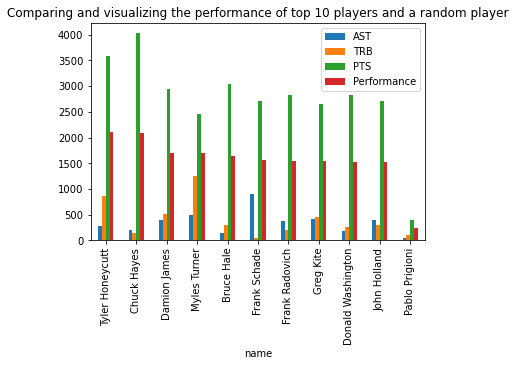

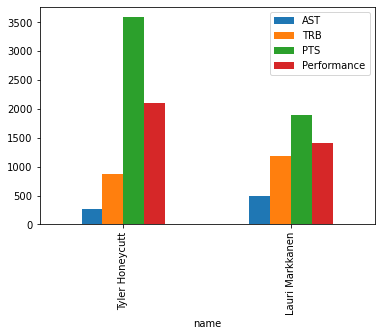

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# set width of bar


class SportsAnalysis:
    def __init__(self, data):
        self.data = data
    
    def calculate_player_stats(self, player_name):
        player_df = self.data[self.data['name'] == player_name]
        points = player_df['PTS'].sum()
        rebounds = player_df['TRB'].sum()
        assists = player_df['AST'].sum()
        return {'points': points, 'rebounds': rebounds, 'assists': assists}
    
    def calculate_career_stats(self, player_name):
        player_df = self.data[self.data['name'] == player_name]
        years_active = player_df['year_end'].max() - player_df['year_start'].min() + 1
        height_inches = player_df['height'].iloc[0]
        try:
          inches = int(height_inches.split("-")[0]) * 12 + int(height_inches.split("-")[1])
        except ValueError:
          print("This value cannot be converted into integer")
        height_feet = int(inches // 12)
        height_inches = int(inches % 12)
        weight = player_df['weight'].mean()
        return {'years_active': years_active, 'height_feet': height_feet,
                'height_inches': height_inches, 'weight': weight}
    
    def visualize_player_performance(self, player_name):
      player_df = self.data[self.data['name'] == player_name]
      data = {'points': 458, 'rebounds': 640, 'assists': 176}
      courses = list(data.keys())
      values = list(data.values())
  
      fig = plt.figure(figsize = (10, 5))
 
      # creating the bar plot
      plt.bar(courses, values, color ='maroon',
      width = 0.4)
 
      plt.xlabel('number_of_games', fontweight ='bold', fontsize = 15)
      plt.ylabel('Points/Rebounds/Assists', fontweight ='bold', fontsize = 15)
      plt.title(player_name + ' Performance')
      plt.legend()
      plt.show()
    
    def visualize_team_performance(self, team_name):
        team_df = self.data[self.data['Team'] == team_name]
        fig, ax = plt.subplots()
        ax.scatter(team_df['PTS'], team_df['TRB'])
        plt.title( 'Visualizing' + team_name + ' Performance')
        plt.xlabel('Points')
        plt.ylabel('Rebounds')
        plt.show()
        
        

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('/Users/meetvanani/Downloads/player_data.csv')
ps = SportsAnalysis(data)

# Calculate career stats for a player

player_stats = ps.calculate_player_stats('Alaa Abdelnaby')
print(player_stats)

# Visualize player height and weight distributions
ps.visualize_player_performance("Alaa Abdelnaby")
#ps.calculate_career_stats("Alaa Abdelnaby")
#ps.visualize_player_height()
#ps.visualize_player_weight()

#Function to calculate performance of all the players and then printing the top-10 players out of the list
def calculate_performance(data):
  player_stars = data[['name','AST','TRB','PTS']]
  player_stars['Performance'] = (player_stars['AST']*0.2) + (player_stars['TRB']* 0.3) + (player_stars['PTS']*0.5) 
  return (player_stars)

player_stars = calculate_performance(data)
print(player_stars)


import random
def top_players(data, n = 10):
  player_stars = calculate_performance(data)
  top_n_players = player_stars.sort_values(by='Performance',ascending = False).head(n)
  return top_n_players

top_10_players = top_players(data)

print(top_10_players)


random.choice(list(top_10_players.index))

#Top-10 players
def plot_player_graph(data_to_plot):
    
    data_to_plot.set_index('name').plot(kind = 'bar')
   


plot_player_graph(top_10_players)



#Comparing top-10 players to one random player
def compare_players(top_n_players,player_to_compare):
    plt.title("Comparing and visualizing the performance of top 10 players")
    top_n_players.loc[10] = player_stars.iloc[player_to_compare]
    top_n_players.set_index('name').plot(kind = 'bar')
    


compare_players(top_10_players,np.random.randint(1, 4540))


#Comparing one of the top-10 player to other random player
import random
def compare_players(data, first_player,player_to_compare):
    plt.title("Comparing and visualizing the performance of top 10 players and a random player")
    temp_df = pd.DataFrame(columns=data.columns)
    temp_df.loc[0] = data.iloc[first_player]
    temp_df.loc[1] = data.iloc[player_to_compare]
    temp_df.set_index('name').plot(kind = 'bar')
    

compare_players(player_stars,random.choice(list(top_10_players.index)) ,np.random.randint(1, 4540))